<a href="https://colab.research.google.com/github/dashmeetm/Machine_Learning_UofT/blob/main/ML3253_TermProject_Final_Cost_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COST PREDICTION FOR LOGISTIC COMPANY - TEAM F
## Machine Learning - 3253
    * Anand Rangarajan
    * Chetan Choudhary
    * Christopher Fernandez
    * Dashmeet Mayal
    * Jaspreet Bhatia


## Data Loading
      Configure Google Drive Paths
      Mount Google Drive 
      Load Kaggle Data from CSV

#### Import required libraries

In [1]:
# General libraries required
import os
import tarfile
from six.moves import urllib
import warnings
warnings.filterwarnings('ignore')

# Numerical libraries
import numpy as np
import random
import pandas as pd

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from IPython.display import display
from plotly.graph_objects import Layout
#plt.style.use('classic') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns
%matplotlib inline

# Data libraries 
from google.colab import drive

print("Importing libraries completed successfully")

Importing libraries completed successfully


#### Load Data

In [3]:
# config:
mount_path = '/content/gdrive'
data_path_root = '/content/gdrive/MyDrive/uoft_ml_team_project/'

# mount google drive. authentication requireed
drive.mount(mount_path)

# Load train, test data from csv.
train_data_path = os.path.join(data_path_root, 'train.csv')
test_data_path = os.path.join(data_path_root, 'test.csv')
print("Training data path exists: ", os.path.exists(train_data_path))
print("Test data path exists: ", os.path.exists(test_data_path))

print("Loading train.csv, test.csv")
kaggle_train_data = pd.read_csv(train_data_path)
kaggle_test_data = pd.read_csv(test_data_path)


MessageError: ignored

## Data Description

      Inspect Raw Data
      Summary Stats
      Compare Test and Train Datasets

#### Inspect raw data

In [ ]:
kaggle_train_data[~np.logical_or.reduce([kaggle_train_data[col].isnull() for col in kaggle_train_data.columns])].head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
6125,t24509454102,2019-12-02,night,snow,S4,D6,2000,expedited,374,TT,D,140.634780
7708,t22623153686,2018-12-13,night,snow,S3,D5,1600,expedited,456,TT,D,138.031596
8629,t52921862070,2017-06-21,night,heat,S6,D1,1400,expedited,375,TT,D,127.898411
13323,t121614410105,2018-12-04,day,snow,S7,D8,3000,expedited,294,TT,D,97.231322
13508,t70764337409,2019-12-22,day,snow,S7,D2,1800,expedited,315,TT,D,102.897585


#### Summary Stats

In [ ]:
kaggle_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


In [ ]:
kaggle_train_data.describe()

,distance,weight,cost
count,38999.000000,38999.000000,38999.000000
mean,2004.061643,42.293033,80.972210
std,728.996843,75.473752,180.715055
min,400.000000,1.000000,5.000000
25%,1400.000000,13.000000,38.768742
50%,2000.000000,25.000000,46.468476
75%,2600.000000,39.000000,70.239797
max,3600.000000,500.000000,2019.734797


#### Compare Test and Train datasets:

In [ ]:
train_cols = kaggle_train_data.columns.to_list()
test_cols = kaggle_test_data.columns.to_list()

print("# of train columns: ", len(train_cols))
print("Train Columns: ", train_cols)
print("# of test columns: ", len(test_cols))
print("Test Columns: ", test_cols)

print("Missing test cols: ", set(train_cols) - set(test_cols))

# of train columns:  12
Train Columns:  ['trip', 'date', 'dayPart', 'exWeatherTag', 'originLocation', 'destinationLocation', 'distance', 'type', 'weight', 'packageType', 'carrier', 'cost']
# of test columns:  11
Test Columns:  ['trip', 'date', 'dayPart', 'exWeatherTag', 'originLocation', 'destinationLocation', 'distance', 'type', 'weight', 'packageType', 'carrier']
Missing test cols:  {'cost'}


## Data Exploration
      Analyze % of nulls in each column
      Scatterplot of all features vs. cost
      Histograms of Numerical Features
      Correlation Analysis of Numerical Features
      

#### Analyze % of nulls in each column

In [ ]:
print("Percent of rows with Null for each column: ")
null_counts = kaggle_train_data.isnull().sum()
null_pct = 100 * null_counts/ kaggle_train_data.shape[0] 
null_pct 

Percent of rows with Null for each column: 


trip                    0.000000
date                    0.000000
dayPart                 0.000000
exWeatherTag           87.481730
originLocation          0.000000
destinationLocation     0.000000
distance                0.000000
type                   90.389497
weight                  0.000000
packageType            93.589579
carrier                 0.000000
cost                    0.000000
dtype: float64

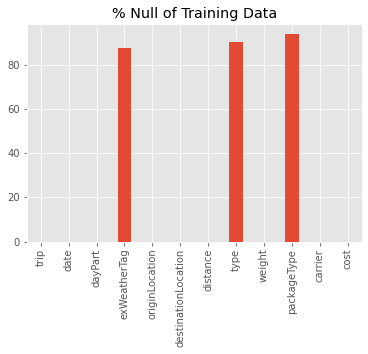

In [ ]:
null_pct.plot.bar(title="% Null of Training Data")

#### Scatter-plot of Columns

In [ ]:
kaggle_train_data.columns

Index(['trip', 'date', 'dayPart', 'exWeatherTag', 'originLocation',
       'destinationLocation', 'distance', 'type', 'weight', 'packageType',
       'carrier', 'cost'],
      dtype='object')

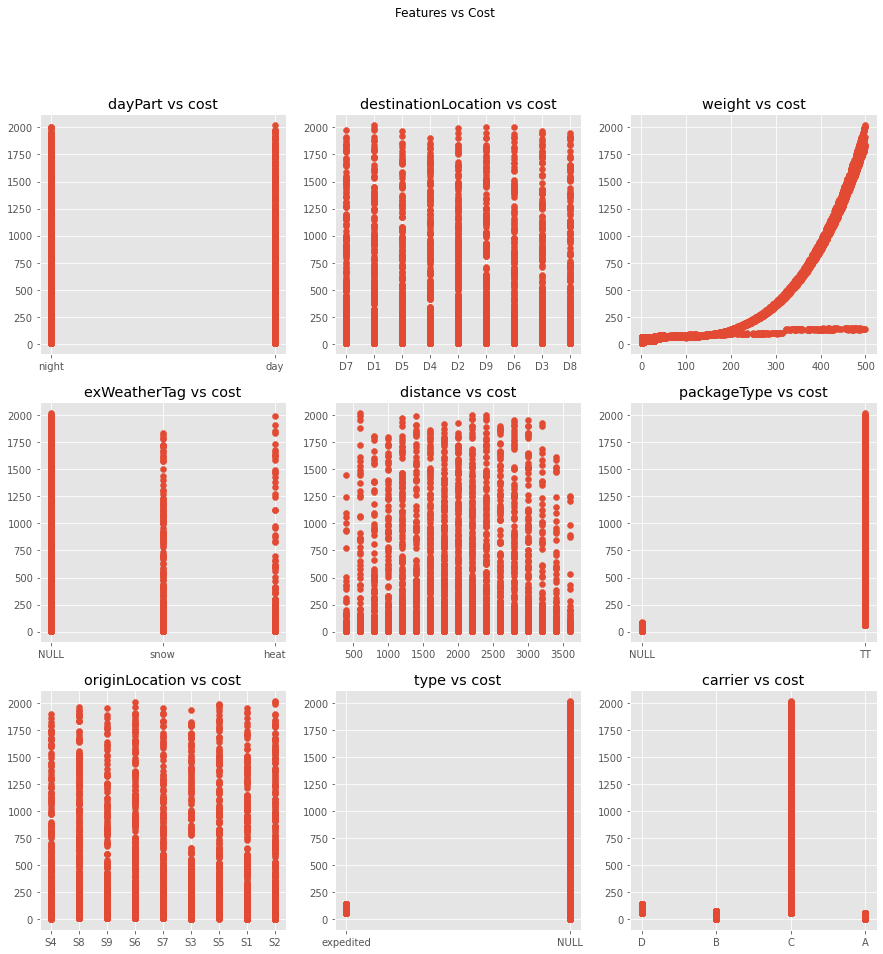

In [ ]:

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Features vs Cost')

# Remove date, trip from plots - these are likely to be distinct (or close) for each observation.
target_cols = [x for x in kaggle_train_data.columns if not x in ["trip", "date", "cost"]]

# Iterate over all remaining columns. Plot feature vs cost scatter plot.
for i in range(3):
  for j in range(3): 
    colIdx = 3 * i + j

    if colIdx > 9:
      continue
    else:
      col = target_cols[colIdx]
      col_data = kaggle_train_data.loc[:, [col, 'cost']].copy()
      if any (col_data[col].isna()):
        col_data[col] = col_data[col].fillna("NULL")
      axs[j, i].scatter(x = col_data[col], y = col_data['cost'])
      axs[j, i].set_title(col + " vs cost")

#### Histograms of Numerical Features, Target

Text(0.5, 0.98, 'Histograms of Numerical  Features, Target')

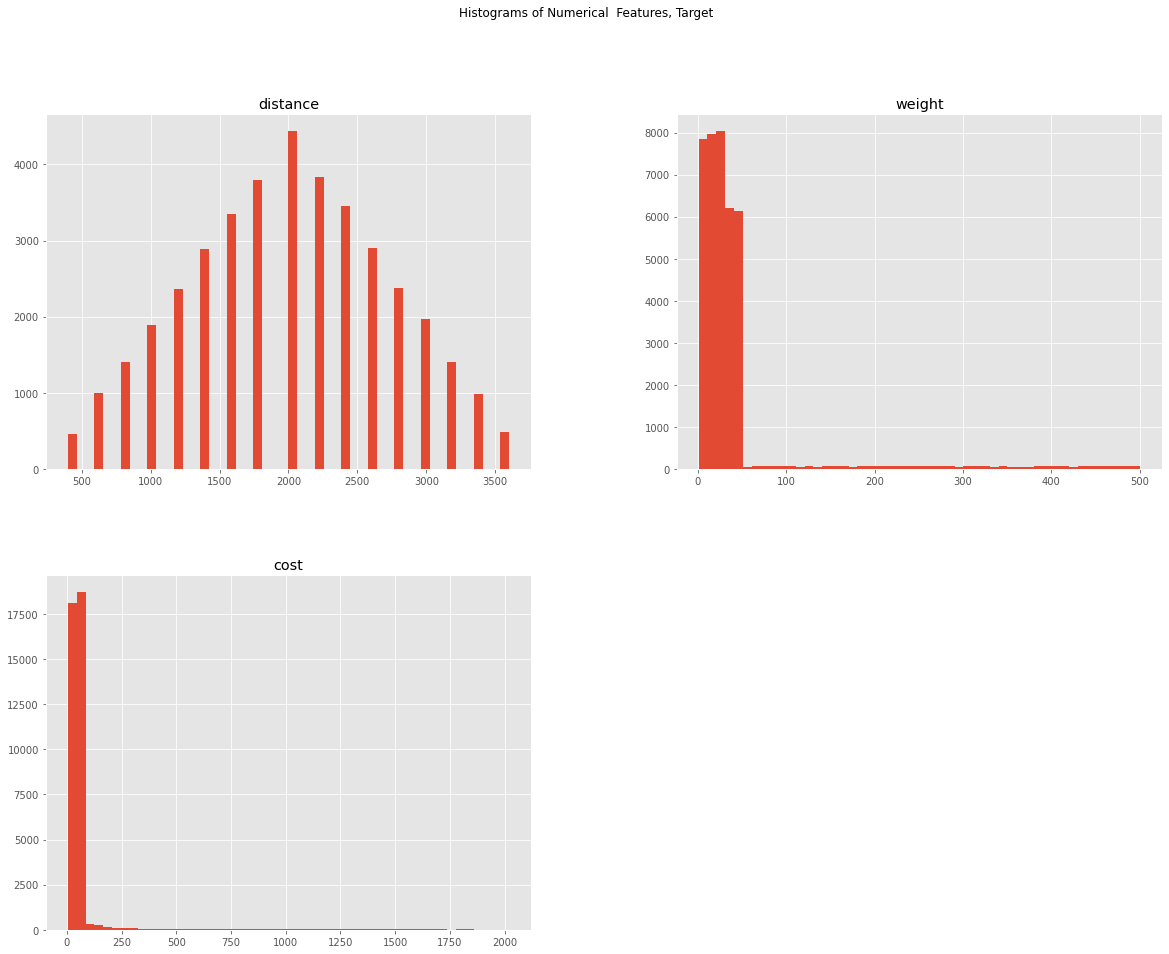

In [ ]:
kaggle_train_data.hist(bins=50, figsize=(20,15))
plt.suptitle("Histograms of Numerical  Features, Target")

#### Correlation Analysis of Numerical Features

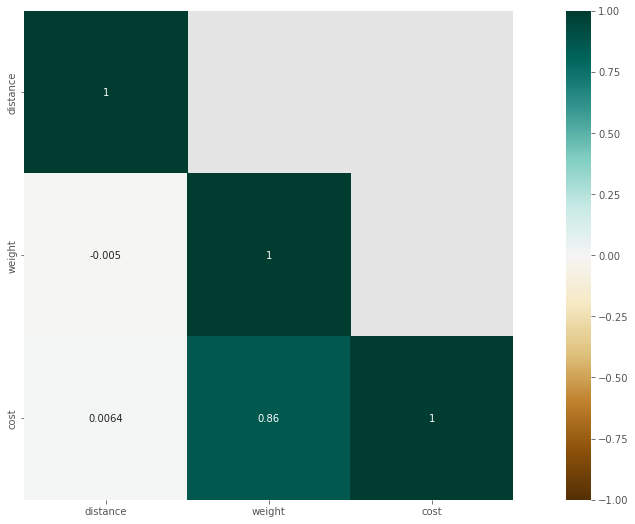

In [ ]:
mask = np.triu(kaggle_train_data.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(kaggle_train_data.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

## Data Preparation 
    Create training dataset variable (copy data loaded from kaggle)
    Justification on Outliers 
    Handling Missing Values (NaN/NULL)
    Feature Engineering: Extract Information from date
    Feature Engineering: Transformations, polynomial features, interactions
    Classify features as numerical/categorical


#### Create training dataset variable (copy data loaded from kaggle)


In [ ]:
# Create a copy of training data. Data size is small relatively (to RAM). 
# This allows us to modify/drop/readd data from original dataset without having to reload data from disk
train_data = kaggle_train_data.copy()

#### Justification on Outliers 
  


Given the distributions of cost (inferred via histograms above), and some variables like weight, it is apparent that there may be some exponential relationships. It is also clear that these (untransformed) features and target are not normally distributed. Based on this, dropping outliers may not prove to be a reasonable approach. All data (row-wise) is kept for further analysis and modelling. 

#### Handling Missing Values (NaN/NULL)



In [ ]:
null_threshold = 0.8

Reviewing the % of nulls above, it is clear that there a handful of features with abnormally high values of null. Reviewing the relationship of nulls vs cost for these variables (using scatterplots above), no reasonable correlation exists. For example, null expedited flag has many high cost examples. Due to data quality concerns, columns with a percent of null values greater than `null_threshold` were dropped

In [ ]:
rem_cols = null_pct.index[null_pct > null_threshold]
print("Columns with > 80% null values to be dropped: ", rem_cols.to_list())

Columns with > 80% null values to be dropped:  ['exWeatherTag', 'type', 'packageType']


#### Feature Engineering: Extract Information from date


In [ ]:
def extract_date_info(dataframe):
    dataframe['isWeekend'] = pd.to_datetime(dataframe['date'].values).dayofweek > 4 
    dataframe['month'] = pd.to_datetime(dataframe['date'].values).month_name()
    dataframe['year'] = pd.to_datetime(dataframe['date'].values).year
    dataframe['day'] = pd.to_datetime(dataframe['date'].values).day
    return(dataframe)

print("Extracting day, month, year, weekend from date column")
train_data = extract_date_info(train_data)
kaggle_test_data = extract_date_info(kaggle_test_data)


Extracting day, month, year, weekend from date column


#### Feature Engineering: Transformations, polynomial features, interactions


In [ ]:
# Functions to add transforms to train & test data systematically.
def add_feature_transforms(dataframe):
  # distance * weight
  dataframe['dw'] = np.multiply(dataframe['distance'], dataframe["weight"])

  # distance / weight
  dataframe['diwe'] = (np.divide(dataframe['weight'], dataframe["distance"])) * 100

  # originDestination
  dataframe["od"] = dataframe['originLocation'] + dataframe['destinationLocation']

  # weightSquared 
  dataframe['weightSq'] = np.multiply(dataframe['weight'], dataframe['weight'])

  # weightSquared x distance
  dataframe['weightSqDist'] = np.multiply(dataframe['weightSq'], dataframe['distance'])

  # log (weight)
  dataframe['logWeight'] =  np.log(dataframe['weight'])

  return(dataframe)


def add_target_transforms(dataframe):
  # log (cost)
  dataframe['logCost'] =  np.log(dataframe['cost'])
  return(dataframe)


print("Adding Feature Transforms to Train and Test Data")
train_data = add_feature_transforms(train_data)
kaggle_test_data = add_feature_transforms(kaggle_test_data)

print("Adding target variable transformations to Train Data")
train_data = add_target_transforms(train_data)


Adding Feature Transforms to Train and Test Data
Adding target variable transformations to Train Data


In [ ]:
# Inspect data
train_data[~np.logical_or.reduce([train_data[col].isnull() for col in train_data.columns])].head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,isWeekend,month,year,day,dw,diwe,od,weightSq,weightSqDist,logWeight,logCost
6125,t24509454102,2019-12-02,night,snow,S4,D6,2000,expedited,374,TT,D,140.634780,False,December,2019,2,748000,18.700000,S4D6,139876,279752000,5.924256,4.946166
7708,t22623153686,2018-12-13,night,snow,S3,D5,1600,expedited,456,TT,D,138.031596,False,December,2018,13,729600,28.500000,S3D5,207936,332697600,6.122493,4.927483
8629,t52921862070,2017-06-21,night,heat,S6,D1,1400,expedited,375,TT,D,127.898411,False,June,2017,21,525000,26.785714,S6D1,140625,196875000,5.926926,4.851236
13323,t121614410105,2018-12-04,day,snow,S7,D8,3000,expedited,294,TT,D,97.231322,False,December,2018,4,882000,9.800000,S7D8,86436,259308000,5.683580,4.577093
13508,t70764337409,2019-12-22,day,snow,S7,D2,1800,expedited,315,TT,D,102.897585,True,December,2019,22,567000,17.500000,S7D2,99225,178605000,5.752573,4.633734


#### Classify features as numerical/categorical



In [ ]:
categorical_features =  ['dayPart', 'originLocation', 'destinationLocation', 'carrier', 'isWeekend', 'month', 'year', 'day', 'od',]
numerical_features = ['distance', 'weight', 'dw', 'diwe', 'weightSq', 'weightSqDist', 'logWeight']

#### Scatter plots of new transformations vs. cost


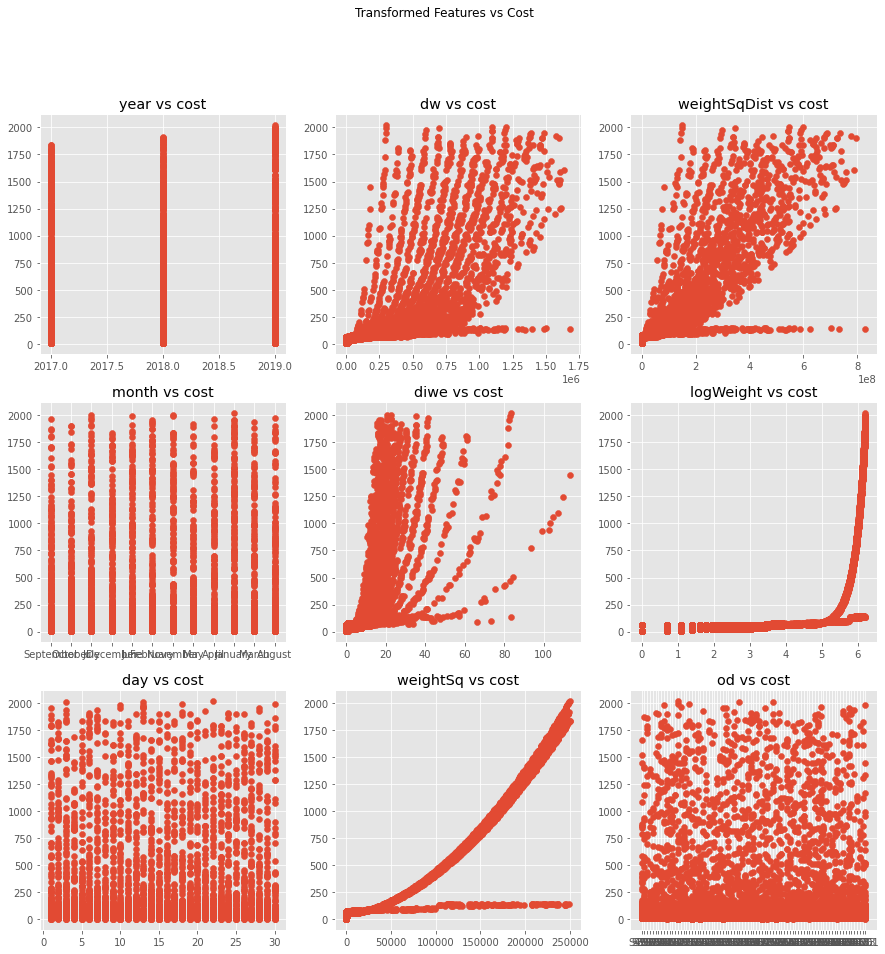

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Transformed Features vs Cost')

# Remove date, trip from plots - these are likely to be distinct (or close) for each observation.
target_cols = ['year', 'month', 'day', 'dw', 'diwe', 'weightSq', 'weightSqDist', 'logWeight', 'od']

# Iterate over all remaining columns. Plot feature vs cost scatter plot.
for i in range(3):
  for j in range(3): 
    colIdx = 3 * i + j

    if colIdx > 9:
      continue
    else:
      col = target_cols[colIdx]
      col_data = train_data.loc[:, [col, 'cost']].copy()
      if any (col_data[col].isna()):
        col_data[col] = col_data[col].fillna("NULL")
      axs[j, i].scatter(x = col_data[col], y = col_data['cost'])
      axs[j, i].set_title(col + " vs cost")

#### Correlation Analysis of new features

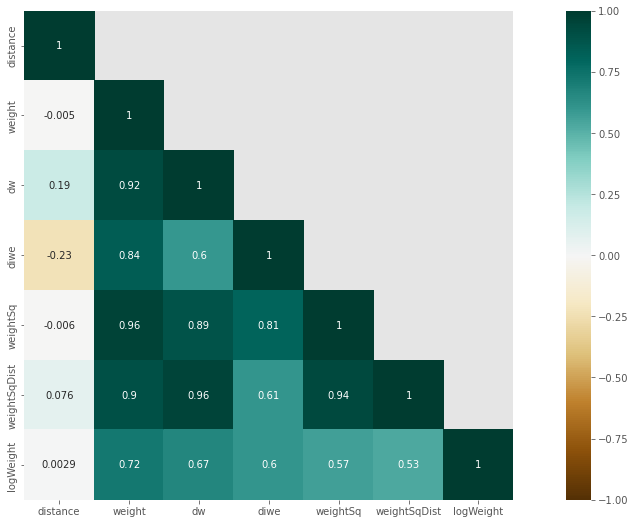

In [ ]:
mask = np.triu(train_data[numerical_features].corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(train_data[numerical_features].corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

## Data Transformation
    

#### Build Training and Test Dataset Variables



In [ ]:
# Subset relevant columns for XGB model
column_subset = ['dayPart', 'exWeatherTag', 'distance', 'type', 'weight', 'packageType',
       'carrier', 'isWeekend', 'month', 'year', 'day', 'od', 'weightSq', 'cost']
data = train_data[column_subset].copy()

column_subset = ['dayPart', 'exWeatherTag', 'distance', 'type', 'weight', 'packageType',
       'carrier', 'isWeekend', 'month', 'year', 'day', 'od', 'weightSq']
test_data = kaggle_test_data[column_subset].copy()

numerical_features = ['distance', 'weight', 'weightSq']
categorical_features = ['dayPart','exWeatherTag', 'type', 'packageType', 'carrier','od','day','month','year']

#### Preprocessing: Null Handling

In [ ]:
data.fillna({'exWeatherTag':'W', 'type':'NEx', 'packageType': 'PT'}, inplace=True)
test_data.fillna({'exWeatherTag':'W', 'type':'NEx', 'packageType': 'PT'}, inplace=True)

In [ ]:
# Inspect data
data.head()

,dayPart,exWeatherTag,distance,type,weight,packageType,carrier,isWeekend,month,year,day,od,weightSq,cost
0,night,W,2200,expedited,50,PT,D,False,September,2017,6,S4D7,2500,68.413152
1,night,W,1800,NEx,12,PT,B,True,October,2017,21,S8D1,144,36.450649
2,night,W,2800,NEx,1,PT,B,True,July,2017,15,S9D5,1,9.057939
3,day,W,3200,NEx,50,PT,C,True,October,2017,22,S9D7,2500,57.320087
4,day,snow,2000,NEx,43,PT,B,False,December,2019,11,S9D1,1849,77.263777


#### Transformations: OneHot Encoding + Scaling Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler, OrdinalEncoder

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(categorical_features)
columns_numerical_list = list(numerical_features)

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown="ignore")),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

# Select Features from data, test_data
X_data = data[categorical_features + numerical_features]
X_test_data = test_data[categorical_features + numerical_features]

# Select Target from data
target = 'cost'
y_data = data[[target]]

# Fit Pipeline using Training Data
pipeline_full.fit(X_data)
X_train = pipeline_full.transform(X_data)
X_test = pipeline_full.transform(X_test_data)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

# No transforms applied to target
y_train = y_data


X_train.shape: (38999, 142)
X_test.shape: (802, 142)


## Model Fitting

### Linear Regression

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(LinearRegression(), X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [54.6237781  57.15797719 61.11984605 58.23886693 53.84644945 60.32939475
 68.07094412 59.3931479  54.0261468  56.63436988]
Mean: 58.34409211616846


### Ridge Regression: Cross Validation with Grid Search

In [ ]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# perform cross validation grid search
param_grid = [{'alpha': [0.005,0.04,0.2,1,20,400,10000]}]
grid_search_rr = GridSearchCV(Ridge(random_state=42), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_train, y_train)

# display results
print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))
grid_search_rr.best_estimator_


{'alpha': 1}
58.49413903120951


Ridge(alpha=1, random_state=42)

### Elastic Net


In [ ]:
# import required libraries
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV

# Perform ElasticNet Random Search
param_grid = [{'alpha': [0.005,0.04,0.2,1,20,400,10000], 'l1_ratio' : [1, 2.5, 3, 3.5, 4]}] 
randomized_search_elastic_net = RandomizedSearchCV(ElasticNet(), param_grid, n_iter=10, cv=10, scoring='neg_mean_squared_error')
randomized_search_elastic_net.fit(X_train, y_train)

# Display results
print(randomized_search_elastic_net.best_params_)
print(np.sqrt(-randomized_search_elastic_net.best_score_))

{'l1_ratio': 1, 'alpha': 0.005}
58.464981021448


### AdaBoost

In [ ]:
# import required libraries
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Fit AdaBoost Model
regr = AdaBoostRegressor(random_state=42, n_estimators=100)
regr.fit(X_train, y_train)

# Calculate training RMSE
y_train_pred = regr.predict(X_train)
val_error = mean_squared_error(y_train, y_train_pred)
rmse  = math.sqrt(val_error)
print("Validation RMSE:", rmse)


Validation RMSE: 42.539625415553594


### Extreme Gradient Boosting
    Fit Model
    Calculate Train RMSE
    Save Model Object
    Kaggle Results

#### Fit Model

In [ ]:
from xgboost import XGBRegressor
rfr = XGBRegressor(n_estimators = 200, max_depth = 5,random_state = 42)
rfr.fit(X_train, y_train)

[16:15:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, n_estimators=200, random_state=42)

#### Calculate Train RMSE

In [ ]:
import math
from sklearn.metrics import mean_squared_error
y_tr_pred = rfr.predict(X_train)
MSE = mean_squared_error(y_train, y_tr_pred)
RMSE = math.sqrt(MSE)
print("TRAIN Root Mean Square Error:", RMSE)

TRAIN Root Mean Square Error: 0.6803459178790671


#### Save Model Results

In [ ]:
y_test_pred = rfr.predict(X_test)
kaggle_result = pd.DataFrame({'trip': kaggle_test_data['trip'], 'cost':y_test_pred})
kaggle_result.to_csv('/content/gdrive/MyDrive/uoft_ml_team_project/model_results/XGB_final_dec11_results2.csv', index=False)  # 800

In [ ]:
import pickle

model_path = os.path.join(data_path_root, "xgb_final_trained2.pickle")
with open(model_path, 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(rfr, f, pickle.HIGHEST_PROTOCOL)


In [ ]:
with open(model_path, 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    rfr_load = pickle.load(f)

[16:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### Kaggle Test Results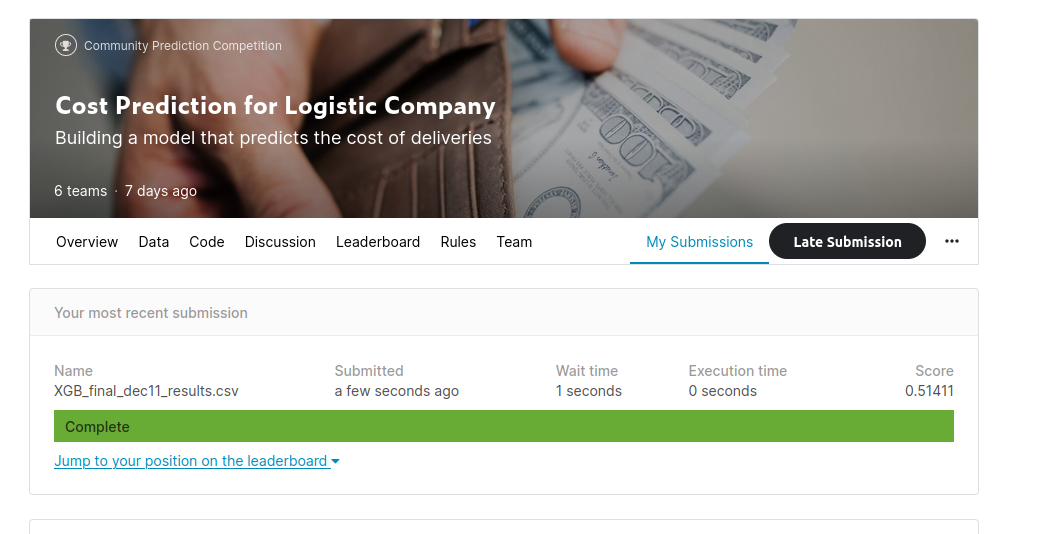

### LGBM

#### Fit Model

In [ ]:
import lightgbm as lgb
lg = lgb.LGBMRegressor(boosting_type="")
lg.fit(X_train, y_train)


LGBMRegressor(boosting_type='')

#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

display_scores(np.sqrt(-1*n_scores))

Scores: [1.28543939 1.59292206 1.47225547 1.50114372 1.54278632 1.33928282
 1.50057066 1.99855623 1.35409257 1.50091154 1.22532063 1.43543055
 1.49290525 1.42787785 1.56080615 1.34184627 1.66844809 1.42893357
 1.51957016 1.17021658 1.67063153 1.46663281 1.51280441 1.11702526
 1.40757135 1.50910692 1.65535612 1.31364156 1.40670594 1.62283311]
Mean: 1.4680541627472716


#### Feature Importance Analysis

<BarContainer object of 10 artists>

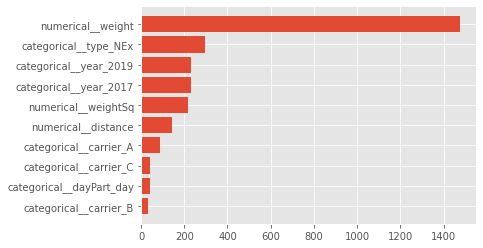

In [ ]:
# Perform Feature Analysis 
feature_importance = lg.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx = np.array(pd.DataFrame(sorted_idx).tail(10))
fi = feature_importance[sorted_idx]

feature_names = pipeline_full.get_feature_names_out()
labels = feature_names[sorted_idx.flatten()]
plt.barh(labels.flatten(), fi.flatten())


#### Save Model Results

In [ ]:
y_test_pred = lg.predict(X_test)
kaggle_result = pd.DataFrame({'trip': kaggle_test_data['trip'], 'cost':y_test_pred})
kaggle_result.to_csv('/content/gdrive/MyDrive/uoft_ml_team_project/model_results/LGBM_final_dec11_results_2.csv', index=False)  # 800

In [ ]:
# Save Model Object
model_path = os.path.join(data_path_root, "lgbm_final_trained2.pickle")
with open(model_path, 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(lg, f, pickle.HIGHEST_PROTOCOL)
    

#### Kaggle Test Results

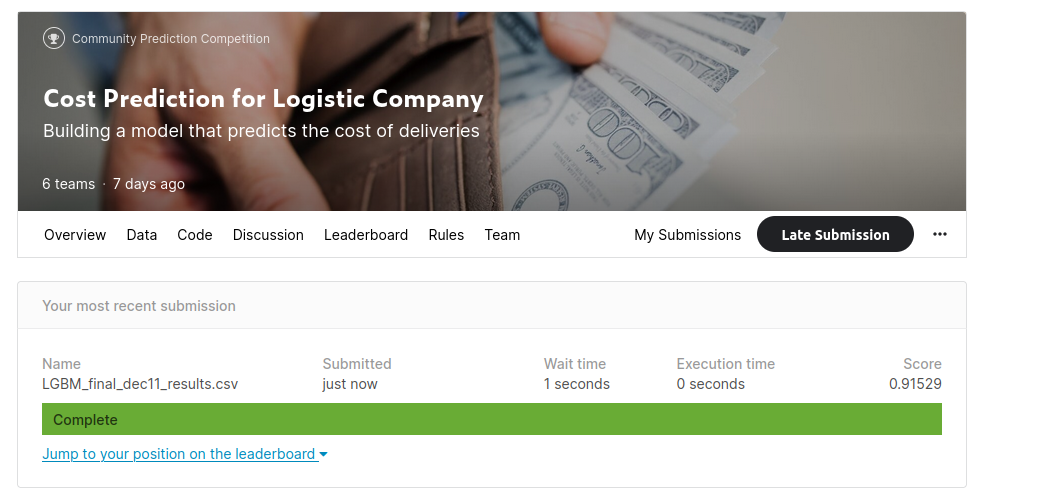

### Blending LGBM and XGB

In [ ]:
# Blend LGBM and XGB models using equal weights
y_pred_blended = (0.5 * lg.predict(X_test)) + (0.5 * rfr.predict(X_test))


#### Save Results

In [ ]:
kaggle_result = pd.DataFrame({'trip': kaggle_test_data['trip'], 'cost':y_pred_blended})
kaggle_result.to_csv('/content/gdrive/MyDrive/uoft_ml_team_project/model_results/blended_final_dec11_results2.csv', index=False)  # 800

In [ ]:
model_path = os.path.join(data_path_root, "blended_final_trained2.pickle")
with open(model_path, 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(rfr, f, pickle.HIGHEST_PROTOCOL)
    

#### Kaggle Results

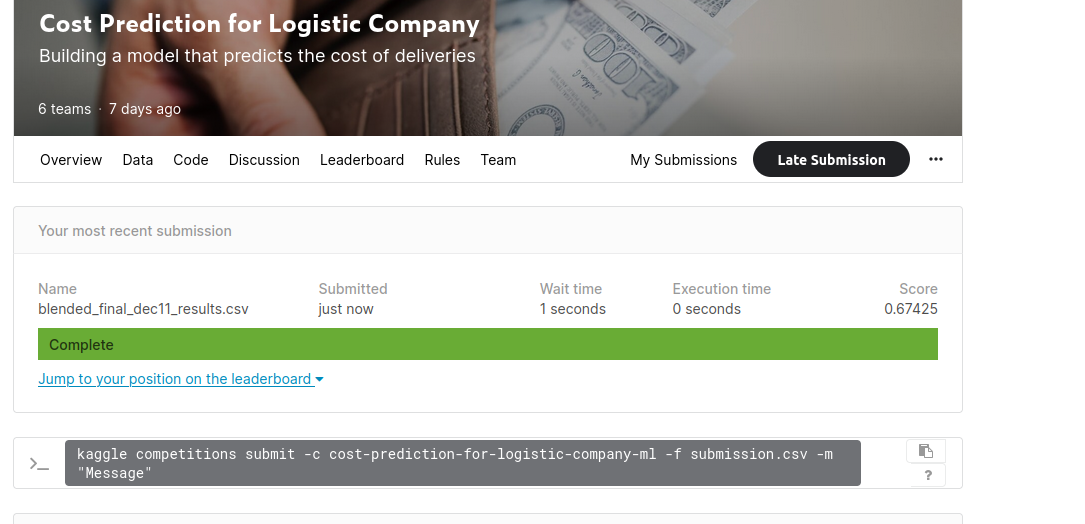

### Neural Network

In [ ]:
import keras
import tensorflow as tf

#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Activation
from keras.layers import MaxPooling2D, Dropout, Conv1D, Conv2D, GlobalMaxPooling1D
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Convolution1D, Dropout
)

# from keras.models import model_from_json
from tensorflow.keras.callbacks import Callback

In [ ]:
# Define Model Architecre

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(X_train.shape[1], kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))
NN_model.add(BatchNormalization()) 
NN_model.add(Dropout(0.2))

NN_model.add(Dense(X_train.shape[1], kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(3, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network:
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

NN_model.summary()

history = NN_model.fit(X_train.toarray(), y_train, epochs=200, batch_size=2000, validation_split = 0.25)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 142)               20306     
                                                                 
 batch_normalization_5 (Batc  (None, 142)              568       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 142)               0         
                                                                 
 dense_25 (Dense)            (None, 142)               20306     
                                                                 
 dense_26 (Dense)            (None, 64)                9152      
                                                                 
 dense_27 (Dense)            (None, 3)                 195       
                                                      

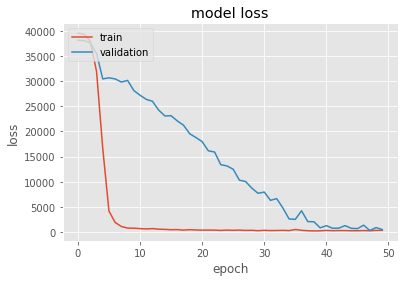

In [ ]:
# Assess model performance
plt.plot(history.history['loss'][0:50])
plt.plot(history.history['val_loss'][0:50])
plt.title('model loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()